In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.io as sio
from mpl_toolkits.basemap import Basemap

In [2]:
fp = 'C:\Users\sleblan2\Research\Calipso\proposal\\'

## Load CERES data

In [3]:
ceres = sio.netcdf_file(fp+'CERES\CERES_SYN1deg-Month_Terra-Aqua-MODIS_Ed3A_Subset_200708-200710.nc','r')

In [64]:
ceres.version

'This is version 3A: May 2, 2014'

In [4]:
var = ceres.variables

In [5]:
var

{'atmos_lw-down_all_200mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55828>,
 'atmos_lw-down_all_500mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab557f0>,
 'atmos_lw-down_all_70mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55860>,
 'atmos_lw-down_clr_200mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55c18>,
 'atmos_lw-down_clr_500mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55be0>,
 'atmos_lw-down_clr_70mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55c50>,
 'atmos_lw-up_all_200mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55780>,
 'atmos_lw-up_all_500mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55748>,
 'atmos_lw-up_all_70mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab557b8>,
 'atmos_lw-up_clr_200mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55b70>,
 'atmos_lw-up_clr_500mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55b38>,
 'atmos_lw-up_clr_70mb_mon': <scipy.io.netcdf.netcdf_variable at 0xab55ba8>,
 'atmos_sw-down_all_200mb_mon': <scipy.io.netcdf.netcdf_

In [49]:
ceres.comment

'Data is from East to West and South to North. See values in latitude and longitudes dimensions.'

In [50]:
ceres.title

'CERES SYN1deg Products - Monthly Means'

In [51]:
ceres.filename

'C:\\Users\\sleblan2\\Research\\Calipso\\proposal\\CERES\\CERES_SYN1deg-Month_Terra-Aqua-MODIS_Ed3A_Subset_200708-200710.nc'

In [19]:
ceres.dimensions

{'lat': 35, 'lon': 40, 'time': 3}

In [10]:
var['time'].data

array([2723, 2754, 2784])

In [31]:
ceres.variables['lon'].data.max()

19.5

In [32]:
ceres.variables['lon'].data.min()

-19.5

In [33]:
ceres.variables['lat'].data.max()

9.5

In [6]:
ceres.variables['cldarea_low_mon'].data.shape

(3L, 35L, 40L)

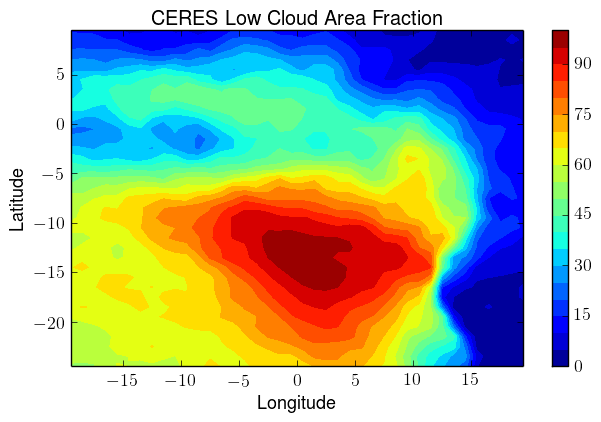

In [7]:
ctr = plt.contourf(ceres.variables['lon'].data,ceres.variables['lat'].data,ceres.variables['cldarea_low_mon'].data[0,:,:],20)
plt.colorbar(ctr)
plt.title('CERES Low Cloud Area Fraction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

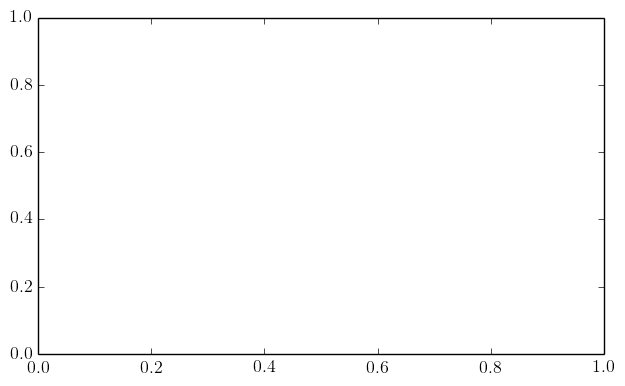

In [8]:
def create_map(lower_left=[-20,-25],upper_right=[20,10],ax=plt.gca()):
    "Create a basemap for the region of South East Atlantic + Africa"
    m = Basemap(projection='stere',lon_0=(upper_right[0]+lower_left[0]),lat_0=(upper_right[1]+lower_left[1]),
            llcrnrlon=lower_left[0], llcrnrlat=lower_left[1],
            urcrnrlon=upper_right[0], urcrnrlat=upper_right[1],resolution='h',ax=ax)
    m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
    m.drawstates()
    m.drawcountries()
    m.drawmeridians(np.linspace(lower_left[0],upper_right[0],8).astype(int),labels=[0,0,0,1])
    m.drawparallels(np.linspace(lower_left[1],upper_right[1],8).astype(int),labels=[1,0,0,0])
    return m

In [40]:
aero_darf = var['toa_comp_sw-up_naer_mon'][2,:,:]-var['toa_comp_sw-up_all_mon'][2,:,:]
aero_darf_sep = var['toa_comp_sw-up_naer_mon'][1,:,:]-var['toa_comp_sw-up_all_mon'][1,:,:]
cld_frac_sep = var['cldarea_low_mon'][1,:,:]
cld_frac = var['cldarea_low_mon'][2,:,:]

In [277]:
aero_tau_aug = var['modis_aod_55_ocean_mon'][0,:,:]
aero_tau_sep = var['modis_aod_55_ocean_mon'][1,:,:]
aero_tau_oct = var['modis_aod_55_ocean_mon'][2,:,:]

In [237]:
var.keys()

['modis_aod_213_ocean_mon',
 'atmos_lw-down_all_200mb_mon',
 'atmos_lw-up_all_500mb_mon',
 'atmos_sw-down_clr_500mb_mon',
 'toa_comp_lw-up_all_mon',
 'modis_aod_55_ocean_mon',
 'atmos_wn-up_all_200mb_mon',
 'toa_comp_sw-up_naer_mon',
 'atmos_wn-down_clr_70mb_mon',
 'toa_comp_lw-up_clr_mon',
 'atmos_sw-up_all_200mb_mon',
 'cldarea_total_mon',
 'atmos_wn-down_all_500mb_mon',
 'modis_aod_47_ocean_mon',
 'modis_aod_164_ocean_mon',
 'cldtau_low_mon',
 'toa_comp_sw-up_clr_mon',
 'toa_comp_sw-down_all_mon',
 'lon',
 'atmos_sw-down_all_500mb_mon',
 'modis_aod_47_land_mon',
 'atmos_lw-down_clr_200mb_mon',
 'atmos_wn-up_all_70mb_mon',
 'toa_comp_lw-up_pri_mon',
 'atmos_wn-up_clr_500mb_mon',
 'atmos_wn-down_all_70mb_mon',
 'atmos_lw-up_all_70mb_mon',
 'toa_comp_lw-up_naer_mon',
 'toa_comp_wn-up_pri_mon',
 'atmos_wn-up_clr_70mb_mon',
 'toa_comp_sw-up_all_mon',
 'atmos_lw-down_all_70mb_mon',
 'cldtau_total_mon',
 'atmos_sw-up_clr_70mb_mon',
 'atmos_sw-down_all_200mb_mon',
 'atmos_lw-up_clr_500mb_mo

In [19]:
import cmaps

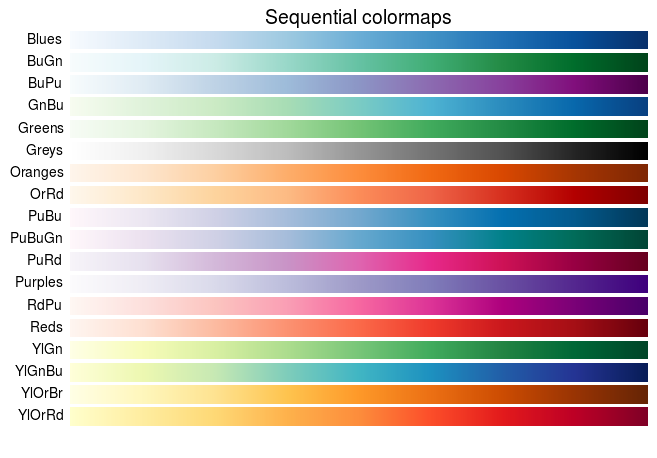

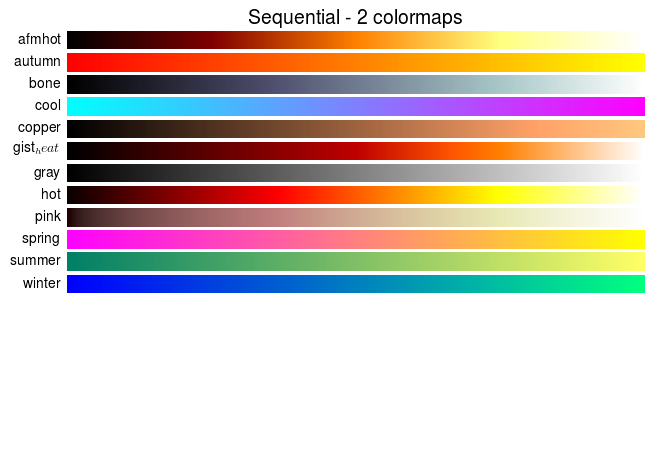

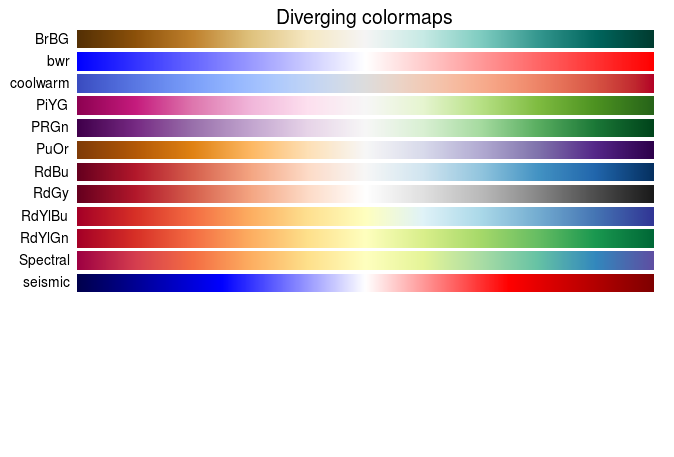

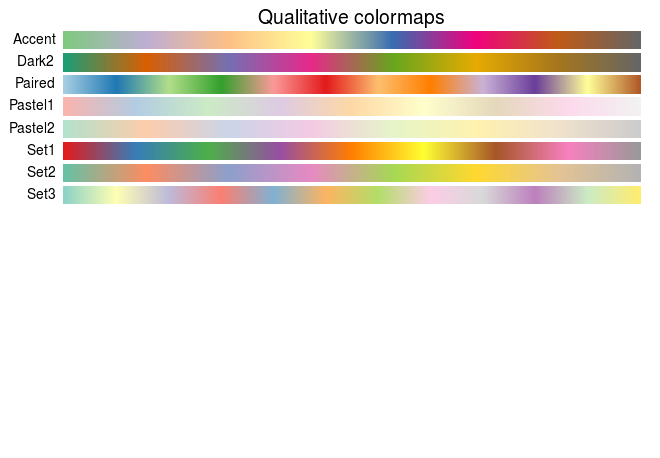

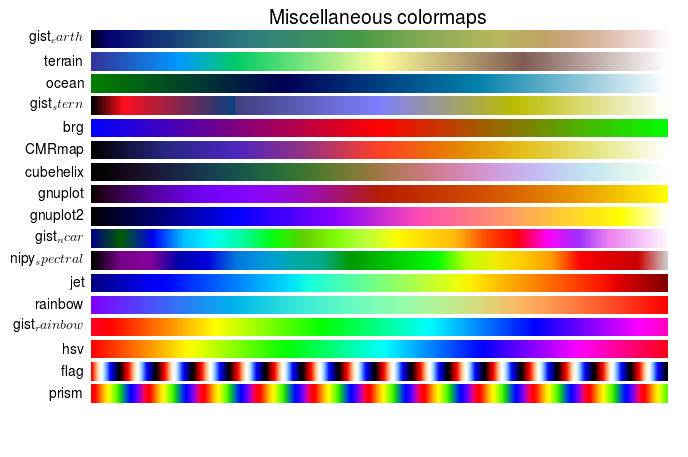

In [20]:
cmaps.cmaps()

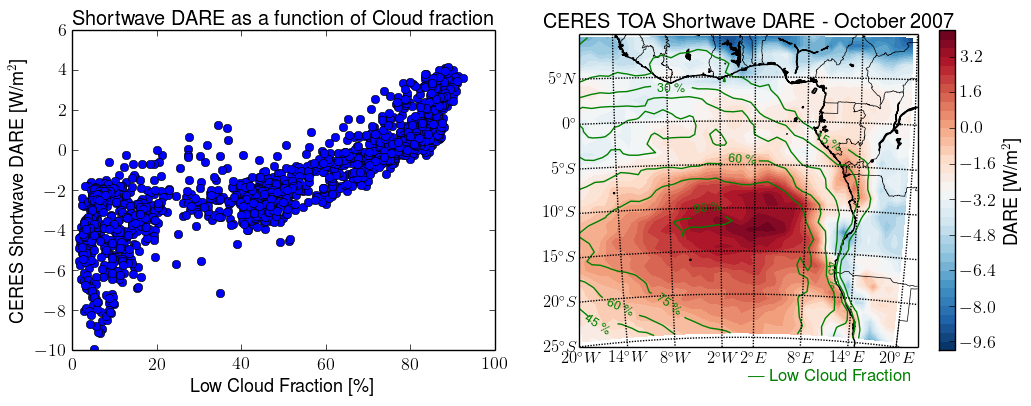

In [63]:
fig,(ax0,ax) = plt.subplots(1,2,figsize=(12,4))
m = create_map(ax=ax)
clon,clat = np.meshgrid(var['lon'].data,var['lat'].data,sparse=False)
x,y = m(clon,clat)
ctr = m.contourf(x,y,aero_darf,40,cmap=plt.cm.RdBu_r)
cbr = plt.colorbar(ctr,ax=ax)
cbr.set_label('DARE [W/m$^{2}$]')
ctrl = m.contour(x,y,cld_frac,8,colors='g')
plt.clabel(ctrl, fontsize=9, inline=1,fmt='%2i \%%')
ax.set_title('CERES TOA Shortwave DARE - October 2007')

ax0.plot(cld_frac.flatten(),aero_darf.flatten(),'o')

ax0.text(160,-11.5,'$\\textrm{---}$ Low Cloud Fraction',color='g')
ax0.set_ylabel('CERES Shortwave DARE [W/m$^{2}$]')
ax0.set_xlabel('Low Cloud Fraction [\%]')
ax0.set_title('Shortwave DARE as a function of Cloud fraction')

plt.savefig(fp+'plots/CERES_SW_DARE_cloud_fraction_Oct2007.png',dpi=600,transparent=True)

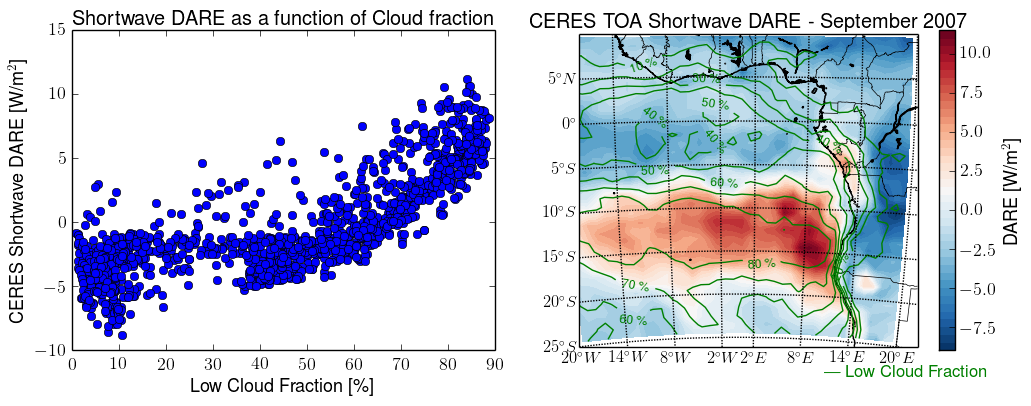

In [70]:
fig,(ax0,ax) = plt.subplots(1,2,figsize=(12,4))
m = create_map(ax=ax)
clon,clat = np.meshgrid(var['lon'].data,var['lat'].data,sparse=False)
x,y = m(clon,clat)
ctr = m.contourf(x,y,aero_darf_sep,40,cmap=plt.cm.RdBu_r)
cbr = plt.colorbar(ctr,ax=ax)
cbr.set_label('DARE [W/m$^{2}$]')
ctrl = m.contour(x,y,cld_frac_sep,8,colors='g')
plt.clabel(ctrl, fontsize=9, inline=1,fmt='%2i \%%')
ax.set_title('CERES TOA Shortwave DARE - September 2007')

ax0.plot(cld_frac_sep.flatten(),aero_darf_sep.flatten(),'o')

#ax0.text(160,-12,'Low Cloud Fraction',color='g')
ax0.set_ylabel('CERES Shortwave DARE [W/m$^{2}$]')
ax0.set_xlabel('Low Cloud Fraction [\%]')
ax0.set_title('Shortwave DARE as a function of Cloud fraction')
ax0.text(160,-12,'$\\textrm{---}$ Low Cloud Fraction',color='g')

plt.savefig(fp+'plots/CERES_SW_DARE_cloud_fraction_Sept2007.png',dpi=600,transparent=True)

In [54]:
aero_darf_aug = var['toa_comp_sw-up_naer_mon'][0,:,:]-var['toa_comp_sw-up_all_mon'][0,:,:]
cld_frac_aug = var['cldarea_low_mon'][0,:,:]

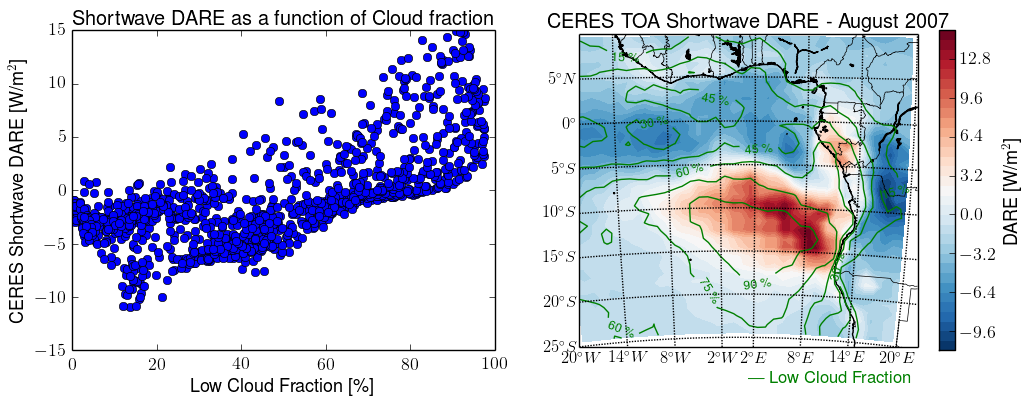

In [71]:
fig,(ax0,ax) = plt.subplots(1,2,figsize=(12,4))
m = create_map(ax=ax)
clon,clat = np.meshgrid(var['lon'].data,var['lat'].data,sparse=False)
x,y = m(clon,clat)
ctr = m.contourf(x,y,aero_darf_aug,40,cmap=plt.cm.RdBu_r)
cbr = plt.colorbar(ctr,ax=ax)
cbr.set_label('DARE [W/m$^{2}$]')
ctrl = m.contour(x,y,cld_frac_aug,8,colors='g')
plt.clabel(ctrl, fontsize=9, inline=1,fmt='%2i \%%')
ax.set_title('CERES TOA Shortwave DARE - August 2007')

ax0.plot(cld_frac_aug.flatten(),aero_darf_aug.flatten(),'o')

#ax0.text(160,-12,'Low Cloud Fraction',color='g')
ax0.set_ylabel('CERES Shortwave DARE [W/m$^{2}$]')
ax0.set_xlabel('Low Cloud Fraction [\%]')
ax0.set_title('Shortwave DARE as a function of Cloud fraction')
ax0.text(160,-18,'$\\textrm{---}$ Low Cloud Fraction',color='g')

plt.savefig(fp+'plots/CERES_SW_DARE_cloud_fraction_Aug2007.png',dpi=600,transparent=True)

## Now subset the different areas

For the ocean

In [138]:
iocean = np.where((clon<10) & (clon>-17) & (clat>-25) & (clat<0))

Prepare funciton to plot greatcircles - to be moved to map_utils

In [ ]:
def plot_greatcircle_path(lon,lat,m=None,*args,**kwargs):
    """
    function to plot a path, defined by the points, all in great circles
    Returns the points along the path in lons, lats
    """
    import numpy as np
    if not m:
        print 'please supply the basemap instance'
        return
    m.plot(lon,lat,marker=kwargs.get('marker'),linestyle='None',color=kwargs.get('color'),latlon=True)
    if kwargs.get('marker'): kwargs['marker'] = None
    for i in xrange(len(lat)-1):
        xy = m.drawgreatcircle(lon[i],lat[i],lon[i+1],lat[i+1],del_s=50.0,*args,**kwargs)
        xlon,ylat = m(xy.vertices[:,0],xy.vertices[:,1],inverse=True)
        if i==0:
            lons,lats = xlon,ylat
        else:
            lons = np.append(lons,xlon,axis=0)
            lats = np.append(lats,ylat,axis=0)
    return lons,lats

Prepare the flight paths

In [186]:
path_15_lon,path_15_lat = [ 14.645278,   9.      ,  -5.      ,   9.      ,  14.645278],[-23., -15., -15., -15., -23.]
path_NS_lon,path_NS_lat = [ 14.645278,  11.      ,  11.      ,   9.      ,   9.      ,
        14.645278], [-23., -15.,  -4.,  -4., -15., -23.]

In [263]:
import itertools
import map_utils as mu
reload(mu)
import plotting_utils as pu
reload(pu)

In [259]:
lons15,lats15 = plot_greatcircle_path(path_15_lon,path_15_lat,m=m,color='y',linewidth=3,marker='x')
lonsNS,latsNS = plot_greatcircle_path(path_NS_lon,path_NS_lat,m=m,color='b',linewidth=2,marker='x')
iocean15 = np.where((lons15<10) & (lons15>-17) & (lats15>-25) & (lats15<0))[0]
ioceanNS = np.where((lonsNS<10) & (lonsNS>-17) & (latsNS>-25) & (latsNS<0))[0]

In [261]:
cld_fr_15 = mu.stats_within_radius(lats15[iocean15],lons15[iocean15],clat,clon,aero_darf_aug,100000,subset=False)

Setting up the lat, lon, localization
... Getting the index points
... Running through index points
['std', 'index', 'range', 'median', 'mean']


In [262]:
cld_fr_NS = mu.stats_within_radius(latsNS[ioceanNS],lonsNS[ioceanNS],clat,clon,aero_darf_aug,100000,subset=False)

Setting up the lat, lon, localization
... Getting the index points
... Running through index points
['std', 'index', 'range', 'median', 'mean']


In [264]:
iNS = unique(list(itertools.chain(*cld_fr_NS['index'])))
i15 = unique(list(itertools.chain(*cld_fr_15['index'])))

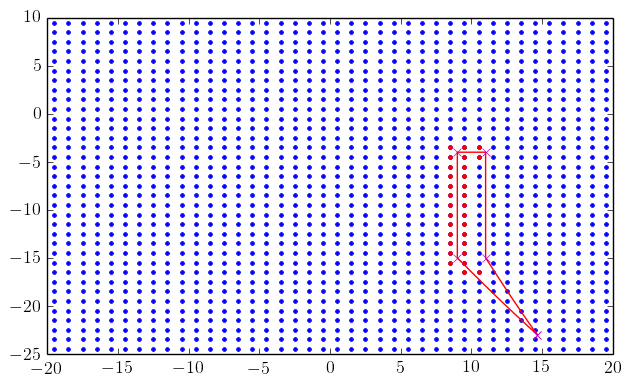

In [265]:
plt.plot(clon,clat,'b.')
plt.plot(clon.flatten()[iNS],clat.flatten()[iNS],'r.')
plt.plot(lonsNS,latsNS,'r-')
plt.plot(path_NS_lon,path_NS_lat,'mx')

In [246]:
clevels = linspace(-12,12,45)

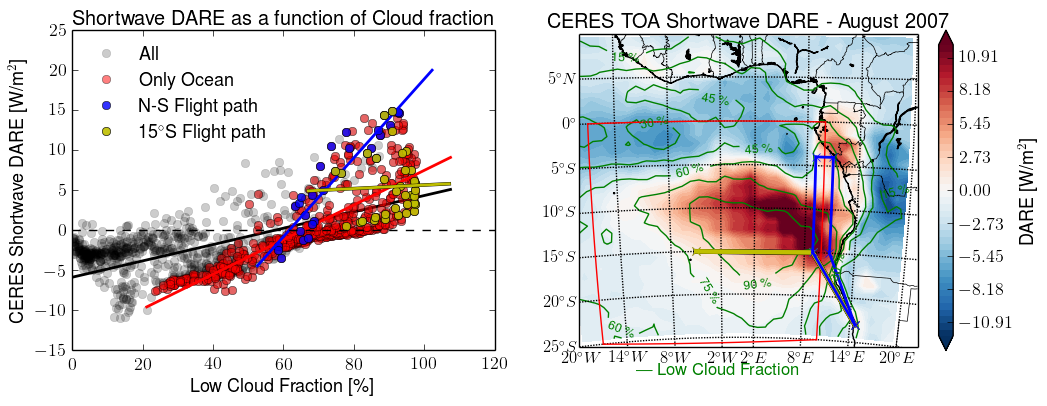

In [272]:
fig,(ax0,ax) = plt.subplots(1,2,figsize=(12,4))
m = create_map(ax=ax)
clon,clat = np.meshgrid(var['lon'].data,var['lat'].data,sparse=False)
x,y = m(clon,clat)
ctr = m.contourf(x,y,aero_darf_aug,clevels,cmap=plt.cm.RdBu_r,extend='both')
cbr = plt.colorbar(ctr,ax=ax)
cbr.set_label('DARE [W/m$^{2}$]')
ctrl = m.contour(x,y,cld_frac_aug,8,colors='g')
plt.clabel(ctrl, fontsize=9, inline=1,fmt='%2i \%%')
ax.set_title('CERES TOA Shortwave DARE - August 2007')
lons,lats = plot_greatcircle_path([10,-17,-17,10,10],[-25,-25,0,0,-25],m=m,color='r')
lons15,lats15 = plot_greatcircle_path(path_15_lon,path_15_lat,m=m,color='k',linewidth=3.5,marker='x')
lons15,lats15 = plot_greatcircle_path(path_15_lon,path_15_lat,m=m,color='y',linewidth=3,marker='x')
lonsNS,latsNS = plot_greatcircle_path(path_NS_lon,path_NS_lat,m=m,color='b',linewidth=2,marker='x')

ax0.plot(cld_frac_aug.flatten(),aero_darf_aug.flatten(),'ko',label='All',alpha=0.2)
pu.plot_lin(cld_frac_aug.flatten(),aero_darf_aug.flatten(),
            labels=False,shaded_ci=False,color='k',ax=ax0,linewidth=2)
ax0.plot(cld_frac_aug[iocean[0],iocean[1]].flatten(),aero_darf_aug[iocean[0],iocean[1]].flatten(),'ro',label='Only Ocean',alpha=0.5)
pu.plot_lin(cld_frac_aug[iocean[0],iocean[1]].flatten(),aero_darf_aug[iocean[0],iocean[1]].flatten(),
            labels=False,shaded_ci=False,color='r',ax=ax0,linewidth=2)
ax0.plot(cld_frac_aug.flatten()[iNS],aero_darf_aug.flatten()[iNS],'bo',label='N-S Flight path',alpha=0.8)
pu.plot_lin(cld_frac_aug.flatten()[iNS],aero_darf_aug.flatten()[iNS],
            labels=False,shaded_ci=False,color='b',ax=ax0,linewidth=2)
ax0.plot(cld_frac_aug.flatten()[i15],aero_darf_aug.flatten()[i15],'yo',linestyle='None',label='15$^\\circ$S Flight path',alpha=0.9)
pu.plot_lin(cld_frac_aug.flatten()[i15],aero_darf_aug.flatten()[i15],
            labels=False,shaded_ci=False,color='k',ax=ax0,linewidth=2.5)
pu.plot_lin(cld_frac_aug.flatten()[i15],aero_darf_aug.flatten()[i15],
            labels=False,shaded_ci=False,color='y',ax=ax0,linewidth=2)
ax0.axhline(0,linestyle='--',color='k')
ax0.legend(frameon=False,loc=2,numpoints=1)

ax0.set_ylabel('CERES Shortwave DARE [W/m$^{2}$]')
ax0.set_xlabel('Low Cloud Fraction [\%]')
ax0.set_title('Shortwave DARE as a function of Cloud fraction')
ax0.text(160,-18,'$\\textrm{---}$ Low Cloud Fraction',color='g')

plt.savefig(fp+'plots/CERES_SW_DARE_cloud_fraction_Aug2007_sub.png',dpi=600,transparent=True)

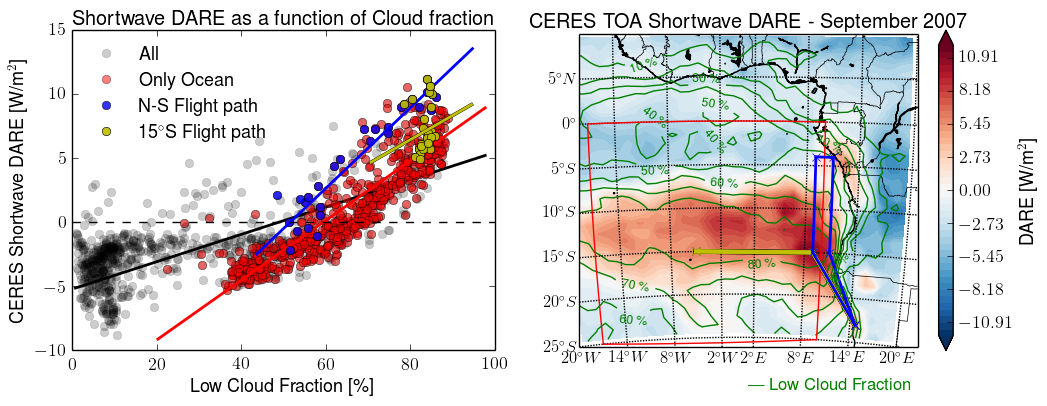

In [273]:
fig,(ax0,ax) = plt.subplots(1,2,figsize=(12,4))
m = create_map(ax=ax)
clon,clat = np.meshgrid(var['lon'].data,var['lat'].data,sparse=False)
x,y = m(clon,clat)
ctr = m.contourf(x,y,aero_darf_sep,clevels,cmap=plt.cm.RdBu_r,extend='both')
cbr = plt.colorbar(ctr,ax=ax)
cbr.set_label('DARE [W/m$^{2}$]')
ctrl = m.contour(x,y,cld_frac_sep,8,colors='g')
plt.clabel(ctrl, fontsize=9, inline=1,fmt='%2i \%%')
ax.set_title('CERES TOA Shortwave DARE - September 2007')
lons,lats = plot_greatcircle_path([10,-17,-17,10,10],[-25,-25,0,0,-25],m=m,color='r')
lons15,lats15 = plot_greatcircle_path(path_15_lon,path_15_lat,m=m,color='k',linewidth=3.5,marker='x')
lons15,lats15 = plot_greatcircle_path(path_15_lon,path_15_lat,m=m,color='y',linewidth=3,marker='x')
lonsNS,latsNS = plot_greatcircle_path(path_NS_lon,path_NS_lat,m=m,color='b',linewidth=2,marker='x')

ax0.plot(cld_frac_sep.flatten(),aero_darf_sep.flatten(),'ko',label='All',alpha=0.2)
pu.plot_lin(cld_frac_sep.flatten(),aero_darf_sep.flatten(),
            labels=False,shaded_ci=False,color='k',ax=ax0,linewidth=2)
ax0.plot(cld_frac_sep[iocean[0],iocean[1]].flatten(),aero_darf_sep[iocean[0],iocean[1]].flatten(),'ro',label='Only Ocean',alpha=0.5)
pu.plot_lin(cld_frac_sep[iocean[0],iocean[1]].flatten(),aero_darf_sep[iocean[0],iocean[1]].flatten(),
            labels=False,shaded_ci=False,color='r',ax=ax0,linewidth=2)
ax0.plot(cld_frac_sep.flatten()[iNS],aero_darf_sep.flatten()[iNS],'bo',label='N-S Flight path',alpha=0.8)
pu.plot_lin(cld_frac_sep.flatten()[iNS],aero_darf_sep.flatten()[iNS],
            labels=False,shaded_ci=False,color='b',ax=ax0,linewidth=2)
ax0.plot(cld_frac_sep.flatten()[i15],aero_darf_sep.flatten()[i15],'yo',linestyle='None',label='15$^\\circ$S Flight path',alpha=0.9)
pu.plot_lin(cld_frac_sep.flatten()[i15],aero_darf_sep.flatten()[i15],
            labels=False,shaded_ci=False,color='k',ax=ax0,linewidth=2.5)
pu.plot_lin(cld_frac_sep.flatten()[i15],aero_darf_sep.flatten()[i15],
            labels=False,shaded_ci=False,color='y',ax=ax0,linewidth=2)
ax0.axhline(0,linestyle='--',color='k')
ax0.legend(frameon=False,loc=2,numpoints=1)

ax0.set_ylabel('CERES Shortwave DARE [W/m$^{2}$]')
ax0.set_xlabel('Low Cloud Fraction [\%]')
ax0.set_title('Shortwave DARE as a function of Cloud fraction')
ax0.text(160,-13,'$\\textrm{---}$ Low Cloud Fraction',color='g')

plt.savefig(fp+'plots/CERES_SW_DARE_cloud_fraction_Sep2007_sub.png',dpi=600,transparent=True)

In [223]:
aero_darf_oct, cld_frac_oct = aero_darf, cld_frac

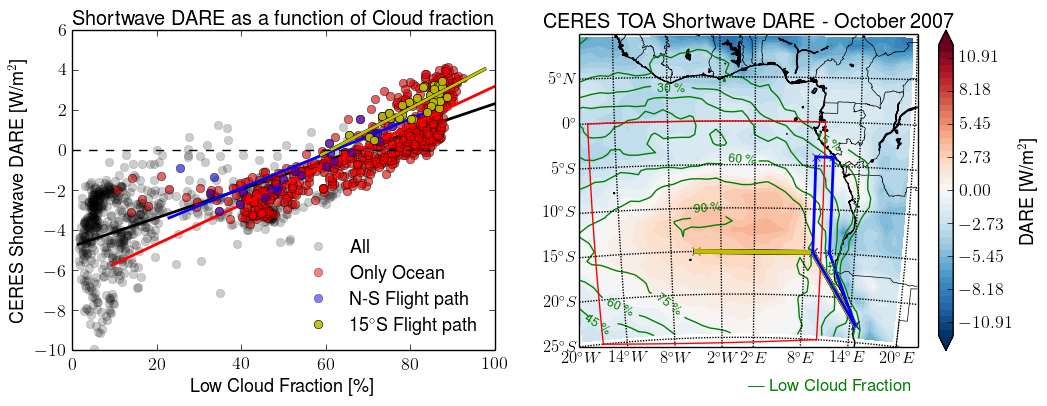

In [276]:
fig,(ax0,ax) = plt.subplots(1,2,figsize=(12,4))
m = create_map(ax=ax)
clon,clat = np.meshgrid(var['lon'].data,var['lat'].data,sparse=False)
x,y = m(clon,clat)
ctr = m.contourf(x,y,aero_darf_oct,clevels,cmap=plt.cm.RdBu_r,extend='both')
cbr = plt.colorbar(ctr,ax=ax)
cbr.set_label('DARE [W/m$^{2}$]')
ctrl = m.contour(x,y,cld_frac_oct,8,colors='g')
plt.clabel(ctrl, fontsize=9, inline=1,fmt='%2i \%%')
ax.set_title('CERES TOA Shortwave DARE - October 2007')
lons,lats = plot_greatcircle_path([10,-17,-17,10,10],[-25,-25,0,0,-25],m=m,color='r')
lons15,lats15 = plot_greatcircle_path(path_15_lon,path_15_lat,m=m,color='k',linewidth=3.5,marker='x')
lons15,lats15 = plot_greatcircle_path(path_15_lon,path_15_lat,m=m,color='y',linewidth=3,marker='x')
lonsNS,latsNS = plot_greatcircle_path(path_NS_lon,path_NS_lat,m=m,color='b',linewidth=2,marker='x')

ax0.plot(cld_frac_oct.flatten(),aero_darf_oct.flatten(),'ko',label='All',alpha=0.2)
pu.plot_lin(cld_frac_oct.flatten(),aero_darf_oct.flatten(),
            labels=False,shaded_ci=False,color='k',ax=ax0,linewidth=2)
ax0.plot(cld_frac_oct[iocean[0],iocean[1]].flatten(),aero_darf_oct[iocean[0],iocean[1]].flatten(),'ro',label='Only Ocean',alpha=0.5)
pu.plot_lin(cld_frac_oct[iocean[0],iocean[1]].flatten(),aero_darf_oct[iocean[0],iocean[1]].flatten(),
            labels=False,shaded_ci=False,color='r',ax=ax0,linewidth=2)
ax0.plot(cld_frac_oct.flatten()[iNS],aero_darf_oct.flatten()[iNS],'bo',label='N-S Flight path',alpha=0.5)
pu.plot_lin(cld_frac_oct.flatten()[iNS],aero_darf_oct.flatten()[iNS],
            labels=False,shaded_ci=False,color='b',ax=ax0,linewidth=2)
ax0.plot(cld_frac_oct.flatten()[i15],aero_darf_oct.flatten()[i15],'yo',linestyle='None',label='15$^\\circ$S Flight path',alpha=0.9)
pu.plot_lin(cld_frac_oct.flatten()[i15],aero_darf_oct.flatten()[i15],
            labels=False,shaded_ci=False,color='k',ax=ax0,linewidth=2.5)
pu.plot_lin(cld_frac_oct.flatten()[i15],aero_darf_oct.flatten()[i15],
            labels=False,shaded_ci=False,color='y',ax=ax0,linewidth=2)
ax0.axhline(0,linestyle='--',color='k')
ax0.legend(frameon=False,loc=4,numpoints=1)

ax0.set_ylabel('CERES Shortwave DARE [W/m$^{2}$]')
ax0.set_xlabel('Low Cloud Fraction [\%]')
ax0.set_xlim([0,100])
ax0.set_title('Shortwave DARE as a function of Cloud fraction')
ax0.text(160,-12,'$\\textrm{---}$ Low Cloud Fraction',color='g')

plt.savefig(fp+'plots/CERES_SW_DARE_cloud_fraction_Oct2007_sub.png',dpi=600,transparent=True)